# Decision Trees for Regression

## Table of Contents

#### Import the Dataset
#### Train the Model and Tune Parameters
#### Random Forest


Decision Trees can provide an efficient classification option when data cannot be separated linearly. The most commonly used decision tree classifier splits the dataset into hyperrectangles with sides parallel to the axes.

## Import the Dataset

In [ ]:
#We will use the concrete dataset.

In [1]:
# First we need to load the libraries to use them

# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Load the dataset

#Import libraries
from tabulate import tabulate
import pandas as pd

df = pd.read_csv("concrete_data.csv", sep=";", header=0)

#Print the dataframe to check it
print(tabulate(df, headers='keys', tablefmt='psql'))

+------+----------+--------+-----------+---------+--------------------+--------------------+------------------+-------+------------------------+
|      |   cement |   slag |   fly_ash |   water |   superplasticizer |   coarse_aggregate |   fine_aggregate |   age |   compressive_strength |
|------+----------+--------+-----------+---------+--------------------+--------------------+------------------+-------+------------------------|
|    0 |    540   |    0   |       0   |   162   |                2.5 |             1040   |            676   |    28 |                  79.99 |
|    1 |    540   |    0   |       0   |   162   |                2.5 |             1055   |            676   |    28 |                  61.89 |
|    2 |    332.5 |  142.5 |       0   |   228   |                0   |              932   |            594   |   270 |                  40.27 |
|    3 |    332.5 |  142.5 |       0   |   228   |                0   |              932   |            594   |   365 |           

## Train the Model and Tune Parameters

In [3]:
#assign the features to X and the target to y
X = df.drop(['compressive_strength'], axis=1)
y = df.compressive_strength

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 70% training and 30% test

You can find the documentation for the Decision Tree Regressor at
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

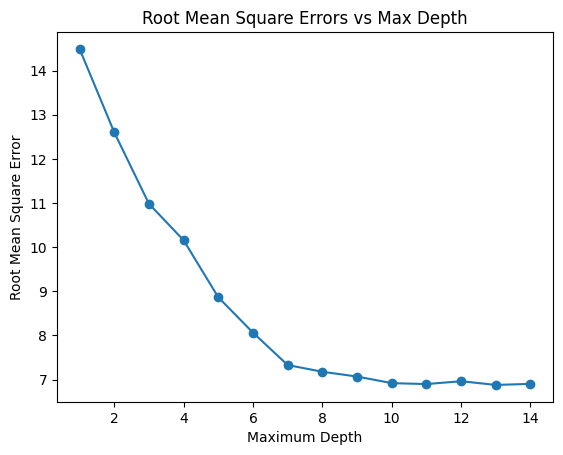

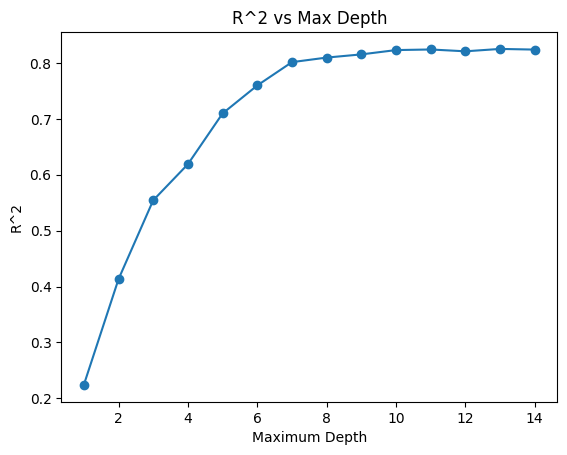

In [4]:
#test different max_depth values
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error

depth = []
error = []
score = []

for i in range(1, 15):
    # Create Decision Tree classifer object
    clf = DecisionTreeRegressor(max_depth=i)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset append accuracy for plotting
    y_pred = clf.predict(X_test)
    depth.append(i)
    error.append(root_mean_squared_error(y_test, y_pred))
    score.append(clf.score(X_test, y_test))

plt.plot(depth, error, '-o')
plt.title('Root Mean Square Errors vs Max Depth')
plt.xlabel('Maximum Depth') 
plt.ylabel('Root Mean Square Error')
plt.show()


plt.plot(depth, score, '-o')
plt.title('R^2 vs Max Depth')
plt.xlabel('Maximum Depth') 
plt.ylabel('R^2')
plt.show()

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth = 7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [6]:
#Number of Terminal Nodes
print("Terminal Node Count:", clf.tree_.node_count)

# Model Accuracy, how often is the classifier correct?
print("Explained Variance (R^2):",metrics.explained_variance_score(y_test, y_pred))

print('Root Mean Squared Error:',metrics.root_mean_squared_error(y_test, y_pred), 'MPa')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred), 'MPa')

Terminal Node Count: 219
Explained Variance (R^2): 0.803998645878205
Root Mean Squared Error: 7.341797931940873 MPa
Mean Absolute Error: 5.210804302309366 MPa


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

# Train Random Forest Classifer
clf = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=50)
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Training complete')

Training complete


In [8]:
# Model Accuracy, how often is the classifier correct?
print("Explained Variance (R^2):",metrics.explained_variance_score(y_test, y_pred))

print('Root Mean Squared Error:',metrics.root_mean_squared_error(y_test, y_pred), 'MPa')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred), 'MPa')

Explained Variance (R^2): 0.8684284212860555
Root Mean Squared Error: 6.015010874311964 MPa
Mean Absolute Error: 4.448238319511049 MPa


Remember that RMSE and MAE are relative to the data values. It can be useful to compare them.

In [9]:
lowest_value = df['compressive_strength'].min()
highest_value = df['compressive_strength'].max()
median_value = df['compressive_strength'].median()
mean_value = df['compressive_strength'].mean()

# Print the results
print(f"Lowest value: {lowest_value}")
print(f"Highest value: {highest_value}")
print(f"Median value: {median_value}")
print(f"Mean value: {mean_value}")

Lowest value: 2.33
Highest value: 82.6
Median value: 34.445
Mean value: 35.817961165048544


In [10]:
percentage_median = round(metrics.root_mean_squared_error(y_test, y_pred) / median_value*100, 2)
percentage_min = round(metrics.root_mean_squared_error(y_test, y_pred) / lowest_value*100, 2)
percentage_max = round(metrics.root_mean_squared_error(y_test, y_pred) / highest_value*100, 2)

print("RMSE is {}% of the median value of the dataset".format(percentage_median))
print("RMSE is {}% of the minimum value of the dataset".format(percentage_min))
print("RMSE is {}% of the maximum value of the dataset".format(percentage_max))

RMSE is 17.46% of the median value of the dataset
RMSE is 258.15% of the minimum value of the dataset
RMSE is 7.28% of the maximum value of the dataset
